## Modelling

In [1]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
import joblib
import src.picks as utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
config = utils.load_config()

In [3]:
X_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

X_test = utils.pickle_load(config["test_set_path"][0])
y_test = utils.pickle_load(config["test_set_path"][1])

X_train_vect = utils.pickle_load(config["vect_set_path"][0])
X_test_vect = utils.pickle_load(config["vect_set_path"][1])


In [4]:
X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,703,704,705,706,707,708,709,710,711,712
0,72,20.8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178549,0.0
1,10,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,102,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281283,0.0
3,87,4.6,0.368792,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,137,7.3,0.000000,0.0,0.0,0.211916,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


#### Change type of column into string

In [5]:
X_train_vect.columns = X_train_vect.columns.astype(str)

In [6]:
X_test_vect.columns = X_test_vect.columns.astype(str)

## Modelling

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a dictionary to store the hyperparameter grids for each algorithm
hyperparameter_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10, 20]},
    'Random Forest': {'n_estimators': [50, 100,200]},
    'AdaBoost': {'n_estimators': [50, 100, 200]}
}
 
# Define the models for each algorithm
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB()
}

best_models = {}

# Perform hyperparameter tuning and get the best models for each algorithm
for algo, model in models.items():
    if algo in hyperparameter_grids:
        param_grid = hyperparameter_grids[algo]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_vect, y_train)
        best_models[algo] = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_accuracy = grid_search.best_score_
    else:
        # For Naive Bayes, there are no hyperparameters to tune
        best_models[algo] = model
        model.fit(X_train_vect, y_train)
        y_pred = model.predict(X_test_vect)
        best_accuracy = accuracy_score(y_test, y_pred)
        best_params = "No hyperparameters to tune."

    print(f"Algorithm: {algo}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Best Accuracy: {best_accuracy:.4f}\n")

# Find the best algorithm based on accuracy
best_algorithm = max(best_models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test_vect)))[0]
print("Best Algorithm:", best_algorithm)


Algorithm: Logistic Regression
Best Hyperparameters: {'C': 1}
Best Accuracy: 0.8114

Algorithm: SVM
Best Hyperparameters: {'C': 1}
Best Accuracy: 0.8086

Algorithm: Decision Tree
Best Hyperparameters: {'max_depth': None}
Best Accuracy: 0.7129

Algorithm: Random Forest
Best Hyperparameters: {'n_estimators': 200}
Best Accuracy: 0.7886

Algorithm: AdaBoost
Best Hyperparameters: {'n_estimators': 50}
Best Accuracy: 0.7571

Algorithm: Naive Bayes
Best Hyperparameters: No hyperparameters to tune.
Best Accuracy: 0.7400

Best Algorithm: SVM


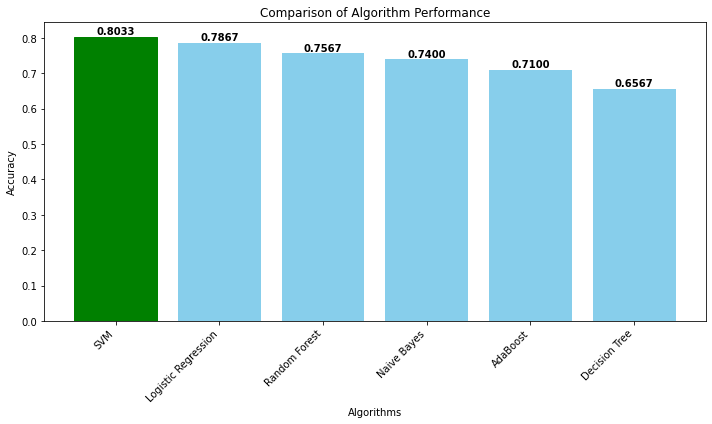

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already obtained the best_accuracy and best_models dictionary
# as computed in the previous code

# Sort the algorithms based on accuracy in descending order
sorted_algorithms = sorted(best_models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test_vect)), reverse=True)

# Extract the algorithm names and accuracies for plotting
algorithm_names = [algo[0] for algo in sorted_algorithms]
accuracies = [accuracy_score(y_test, algo[1].predict(X_test_vect)) for algo in sorted_algorithms]

# Find the index of the highest accuracy value
highest_index = np.argmax(accuracies)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithm_names, accuracies, color='skyblue')

# Highlight the highest algorithm by changing its color
bars[highest_index].set_color('green')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Performance')
plt.xticks(rotation=45, ha='right')

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

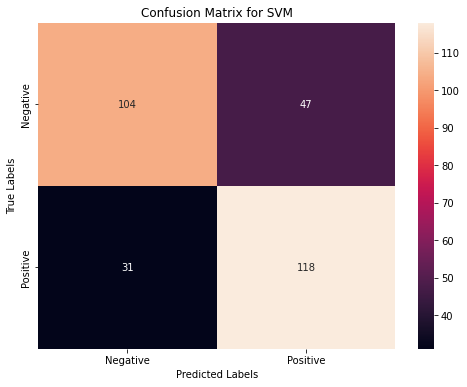

In [21]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for {best_algorithm}')
plt.show()

In [23]:
# Get the best model corresponding to the best_algorithm
best_model = best_models[best_algorithm]

# Fit the best model on the entire training set (X_train and y_train combined)
best_model.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test_vect)

# Generate the classification report
class_report = classification_report(y_test, y_pred)

print(f"Classification Report for {best_algorithm}:\n")
print(class_report)

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.80      0.80      0.80       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



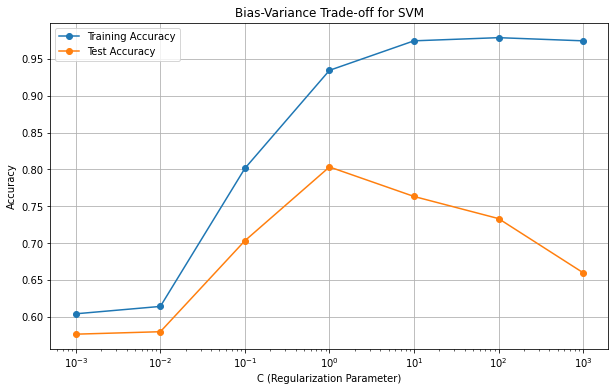

In [22]:
# Define a range of C values for the SVM model
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Lists to store the training and test accuracies for each C
train_accuracies = []
test_accuracies = []

for C in C_values:
    # Create the SVM model with the specified C value and a linear kernel
    model = SVC(C=C, kernel='linear')

    # Fit the model on the training set
    model.fit(X_train_vect, y_train)

    # Predict on the training and test sets
    y_train_pred = model.predict(X_train_vect)
    y_test_pred = model.predict(X_test_vect)

    # Calculate the accuracies and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the bias-variance trade-off curve
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.semilogx(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title(f'Bias-Variance Trade-off for {best_algorithm}')
plt.legend()
plt.grid(True)
plt.show()

## Dump Model

In [32]:
utils.pickle_dump(best_algorithm, config["production_model_path"])

['models/production_model.pkl']

In [33]:
model = utils.pickle_load(config["production_model_path"])

In [34]:
# Compute the confusion matrix
y_pred = model.predict(X_test_vect)
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[118  33]
 [ 31 118]]


## Test 

In [41]:
import string

In [104]:
text = input("Masukkan text: ") # String Input.

Masukkan text:  Penjual nya ga ramah, barangnya jelek !!!!


In [105]:
text

'Penjual nya ga ramah, barangnya jelek !!!!'

In [106]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [107]:
punct = count_punct(text)

In [108]:
review_len = len(text) - text.count(" ")

In [109]:
import src.function as fc
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize.treebank import TreebankWordDetokenizer
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
import re

In [110]:
kamusalay_dict = utils.pickle_load(config["kamusalay_dict"])

In [111]:
def remove_punct(tweet):
    """
    Remove punctuation and other unwanted characters from a tweet.

    Args:
        tweet (str): A string containing the text of the tweet.

    Returns:
        str: A modified string with punctuation, numbers, hashtags, and URLs removed.
    """
    #removes any leading or trailing white space from the tweet.
    #tweet = tweet.strip()
    
    #replaces any non-alphanumeric characters (excluding spaces) with a space
    tweet = re.sub('[^a-zA-Z0-9 ]', ' ', str(tweet))
    
    #removes any digits from the tweet. This is done to remove any numbers that might not be relevant to the analysis.
    tweet = re.sub('[0-9]+', ' ', tweet)
    
    #removes the hash symbol (#) from the tweet. This is done to remove any hashtags that might be used in social media platforms.
    tweet = re.sub(r'#', '', str(tweet))  
    
    #removes any hyperlinks from the tweet. This is done to remove any links that might be present in the tweet.
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    #replaces any multiple spaces or newline characters with a single space. This is done to make sure that there are no unnecessary spaces in the tweet.
    tweet = re.sub(r'\s+|\\n', ' ', tweet)
    
    #removes the text "RT" (which stands for "retweet") and any whitespace characters that follow it. This is done to remove any retweets that might be present in the tweet.
    tweet = re.sub('RT[\s]+', '', tweet) # Removing RT
    
    #removes any hyperlinks from the tweet. This is done to remove any links that might be present in the tweet.
    tweet = re.sub('https?:\/\/\S+', '', tweet) # Removing hyperlink

    return tweet

In [114]:
data = {'cleaned_data': [cleaned_data],
      'review_len': [review_len],
      'punct': [punct]}

df = pd.DataFrame(data)
df

,cleaned_data,review_len,punct
0,jual nya ga ramah barang jelek,36,13.9


In [112]:
text = remove_punct(text)
text = fc.case_folding(text)
text = fc.stemming(text)
text = fc.tokenization(str(text))
kamusalay_dict = utils.pickle_load(config["kamusalay_dict"])
try: 
    text = fc.normalisasi(text)    
except:
    text = text
text = fc.remove_stopwords(text)
text = fc.detokenize_text(text)
cleaned_data = text.replace(r'\b\w\b', '').replace(r'\s+', ' ').replace('xf','')

In [113]:
cleaned_data

'jual nya ga ramah barang jelek'

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['cleaned_data'])
tfidf_test = tfidf.transform(df['cleaned_data'])

df = pd.concat([df[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

In [126]:
tfidf_model = tfidf.fit(X_train['cleaned_data'])

In [122]:
utils.pickle_dump(tfidf_model, config["tfidf_train_path"])

['data/processed/tfidf_train.pkl']

In [127]:
utils.pickle_dump(tfidf_model, config["tfidf_model_path"])

['data/processed/tfidf_model.pkl']

In [116]:
df.columns =df.columns.astype(str)

In [117]:
hasil_prediksi = model.predict(df)
hasil_prediksi

array([0], dtype=int64)

In [118]:
if hasil_prediksi == 1:
    print('Hasil Sentiment: Positif')
else:
    print('Hasil Sentiment: Negatif')   

Hasil Sentiment: Negatif
